In [2]:
#libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb


%matplotlib inline
sns.set()
#preprocess
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
#models
from sklearn.svm import SVC
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from scipy.stats import randint as sp_randint
from sklearn.ensemble import BaggingClassifier,VotingClassifier, AdaBoostClassifier, StackingClassifier, RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

#check
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
#save
import pickle as pk

In [3]:
%cd "C:\Users\curna\Desktop\Data"
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head(5)

C:\Users\curna\Desktop\Data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Data Cleanign 

In [6]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df = df.fillna(df["TotalCharges"].mean())

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['customerID'].duplicated().sum()

0

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
def replace(value):
    if value == 0:
        return "NO"
    else:
        return "Yes"

# Apply the replace function to the SeniorCitizen column
df['SeniorCitizen'] = df['SeniorCitizen'].apply(replace)


#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NO,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NO,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NO,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NO,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NO,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#converted no and no internet servicer = no  and yes = yes values of 'MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies' to yes/no to make it easier to understand

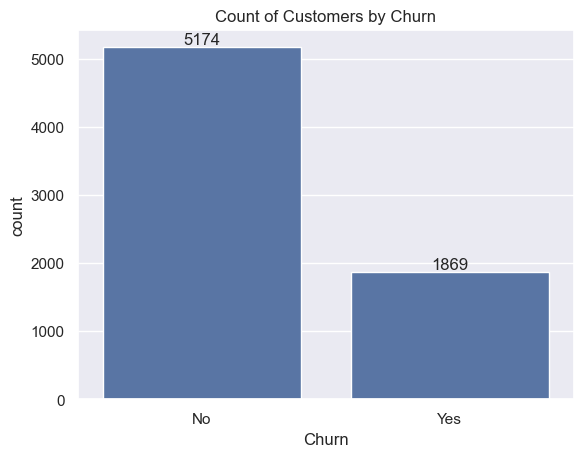

In [17]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

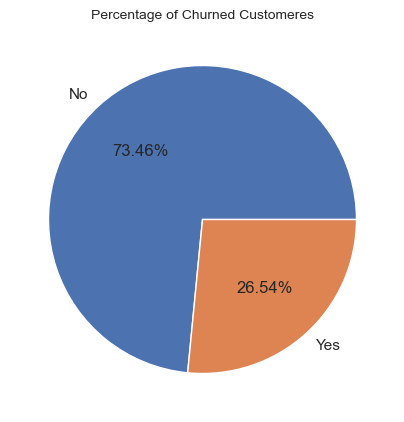

In [18]:
plt.figure(figsize = (5,5))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customeres", fontsize = 10)
plt.show()

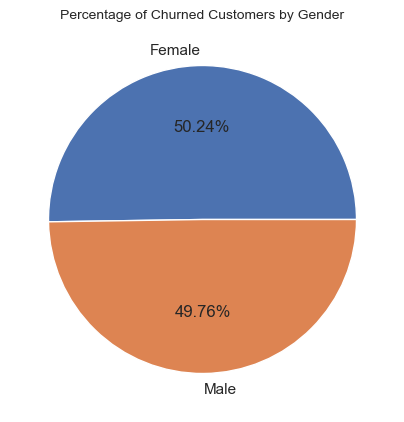

In [19]:
churned_customers = df[df['Churn'] == 'Yes']
gb = churned_customers.groupby("gender").agg({'gender': "count"})
plt.figure(figsize=(5, 5))
plt.pie(gb['gender'], labels=gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers by Gender", fontsize=10)
plt.show()


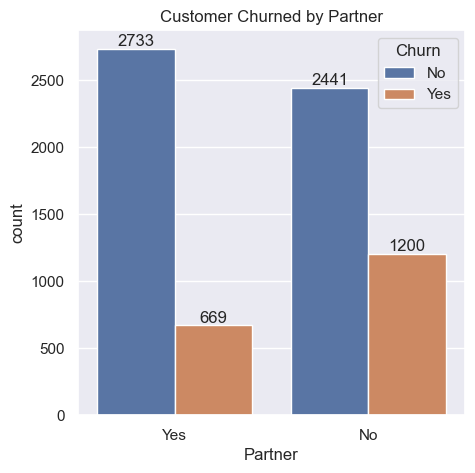

In [20]:
plt.figure(figsize= (5,5))
plt.title('Customer Churned by Partner')
ax = sns.countplot(x = 'Partner',data = df, hue= 'Churn' )
for container in ax.containers:
    ax.bar_label(container)
plt.show()

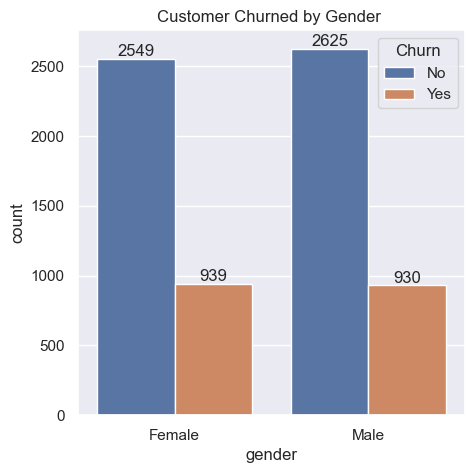

In [21]:
plt.figure(figsize= (5,5))
plt.title('Customer Churned by Gender ')
ax = sns.countplot(x = 'gender',data = df, hue= 'Churn' )
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Churn customer by Gender

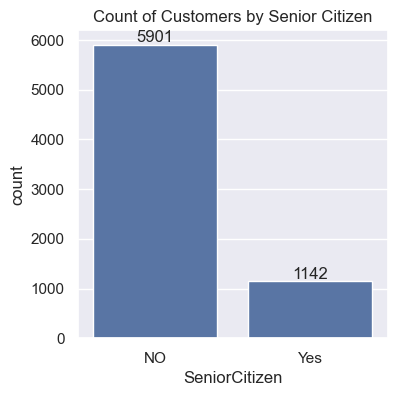

In [22]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

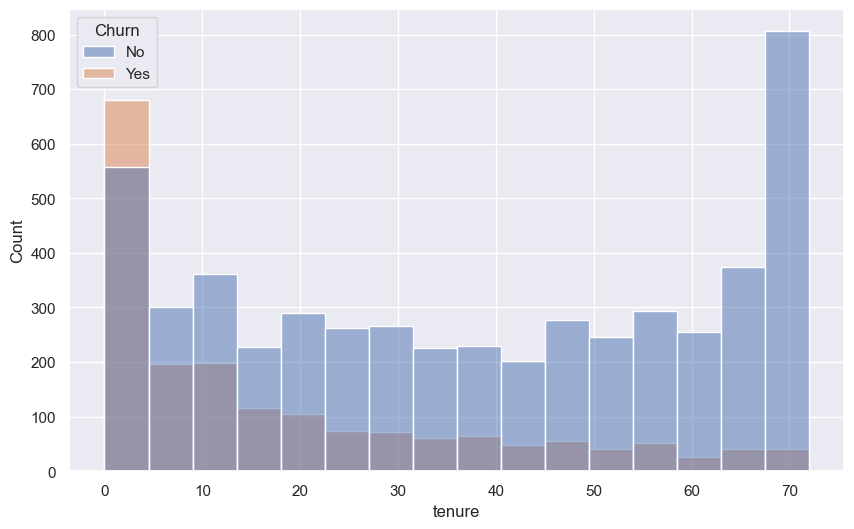

In [23]:
plt.figure(figsize = (10,6))
sns.histplot(x = 'tenure', data = df, hue= 'Churn')
plt.show()

#people who have used our services for a long time have stayed and people who have used our sevices #1 or 2 months have churned

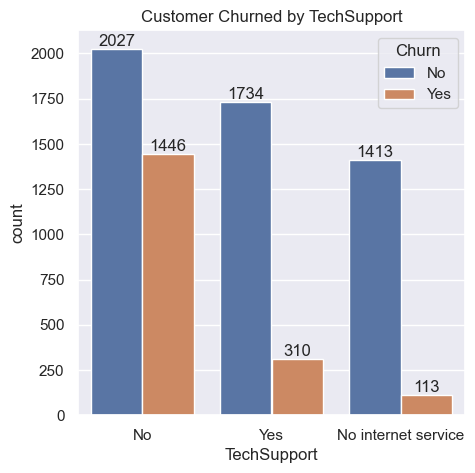

In [24]:
plt.figure(figsize= (5,5))
plt.title('Customer Churned by TechSupport')
ax = sns.countplot(x = 'TechSupport',data = df, hue= 'Churn' )
for container in ax.containers:
    ax.bar_label(container)
plt.show()

No tack Support have high risk to churnout

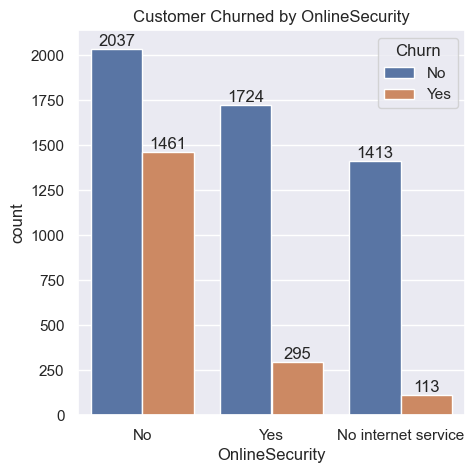

In [25]:
plt.figure(figsize= (5,5))
plt.title('Customer Churned by OnlineSecurity')
ax = sns.countplot(x = 'OnlineSecurity',data = df, hue= 'Churn' )
for container in ax.containers:
    ax.bar_label(container)
plt.show()

No Online Security have high risk to churnout

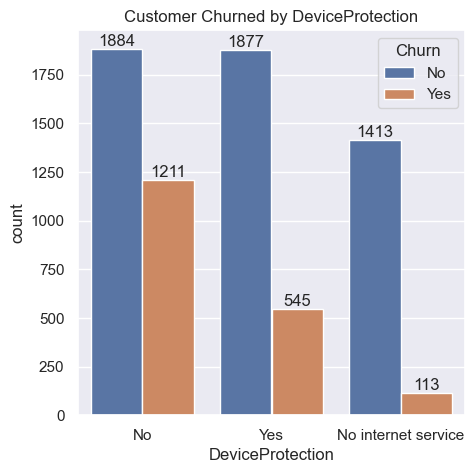

In [26]:
plt.figure(figsize= (5,5))
plt.title('Customer Churned by DeviceProtection')
ax = sns.countplot(x = 'DeviceProtection',data = df, hue= 'Churn' )
for container in ax.containers:
    ax.bar_label(container)
plt.show()

No divice Protection have high risk to churnout

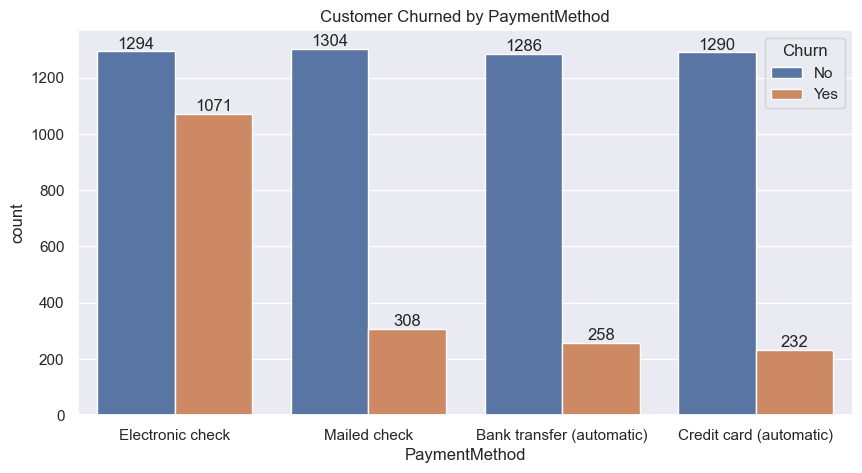

In [27]:
plt.figure(figsize = (10,5))
plt.title('Customer Churned by PaymentMethod')
ax = sns.countplot(x = 'PaymentMethod', data = df, hue= 'Churn')
for container in ax.containers:
    ax.bar_label(container)
plt.show()


Electronic Check have high risk to churnout

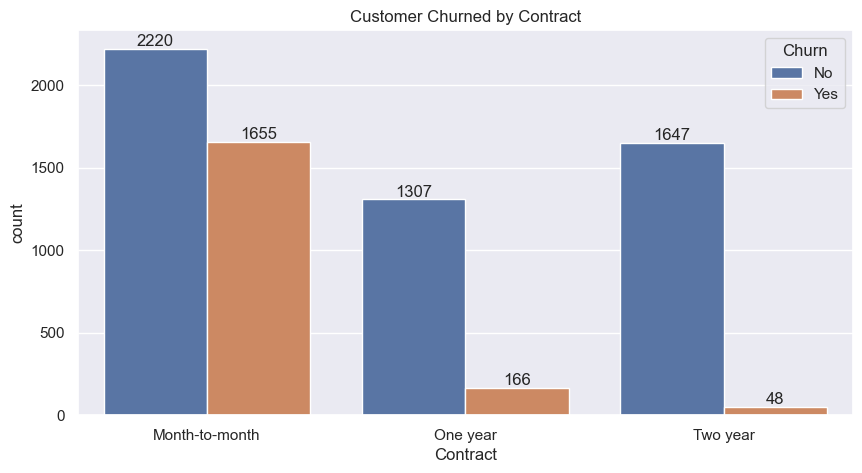

In [28]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x = 'Contract', data = df, hue= 'Churn')
plt.title('Customer Churned by Contract')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

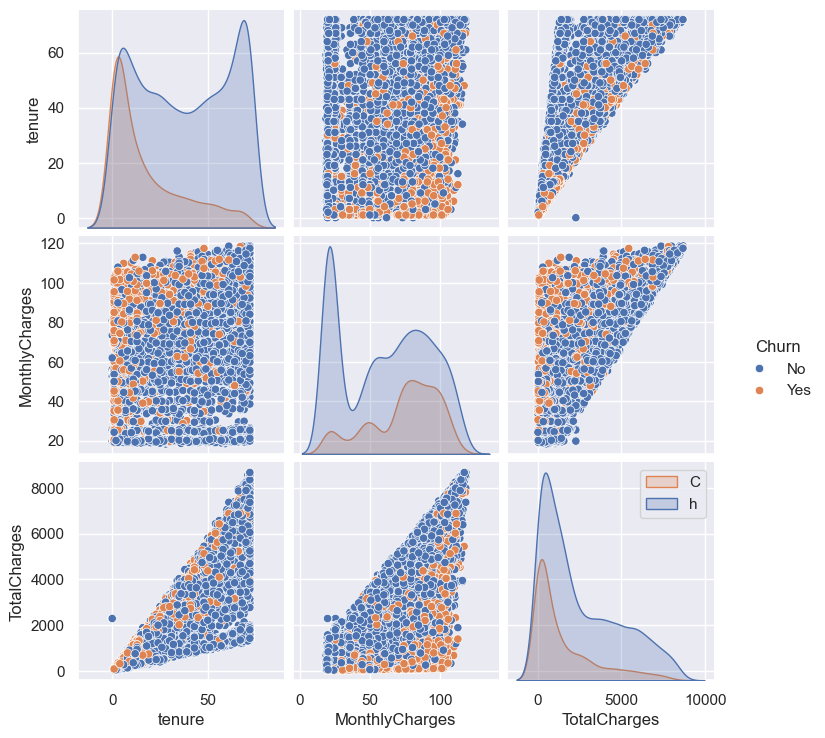

In [29]:
sns.pairplot(data = df , hue= 'Churn')
plt.legend('Churn')

Monthy to month have high risk to churnout

Concluation of data analysis 
These are some of the quick insights from this exercise:

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support,Device Protection category are high churners
4. Non senior Citizens are high churners

Note: There could be many more such insights, so take this as an assignment and try to get more insights 

In [30]:
 #chack garbage value
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print('****'*10)

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
****************************************
gender
Male      3555
Female    3488
Name: count, dtype: int64
****************************************
SeniorCitizen
NO     5901
Yes    1142
Name: count, dtype: int64
****************************************
Partner
No     3641
Yes    3402
Name: count, dtype: int64
****************************************
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
****************************************
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
****************************************
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
****************************************
InternetService
Fiber optic    3096
DSL            2421
No    

There is no  garbage value

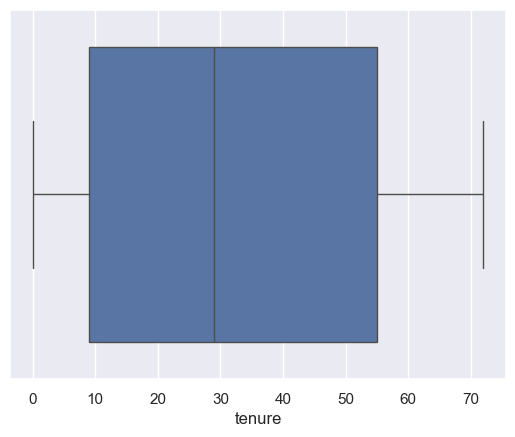

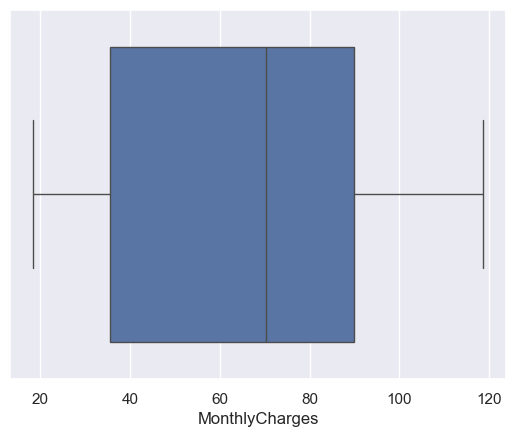

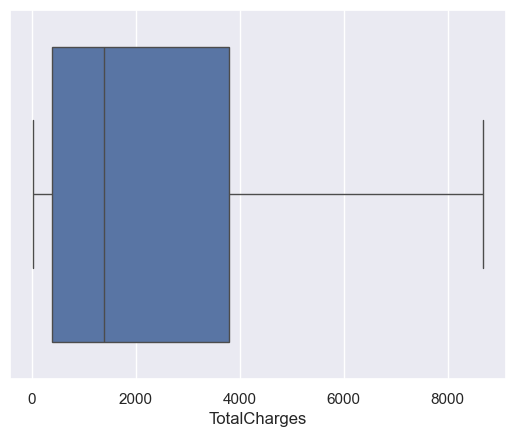

In [31]:
#identify outliers
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.show()

#There is no Outlear

Encoding

In [32]:
le = LabelEncoder()

In [33]:
df1=df.copy()
df2 = df.copy()

In [34]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NO,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NO,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NO,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NO,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NO,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,NO,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,NO,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,NO,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,NO,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,NO,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [35]:
# List of columns to apply Label Encoding
columns_to_encode = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Loop over the columns and apply Label Encoding
for col in columns_to_encode:
    df1[col] = le.fit_transform(df1[col])

In [36]:
# List of columns to One-Hot Encode
columns_to_one_hot_encode = ['MultipleLines', 'OnlineBackup', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']

# Loop over the columns and apply One-Hot Encoding with drop_first=True
for col in columns_to_one_hot_encode:
    one_hot = pd.get_dummies(df1[col], prefix=col, drop_first=True)
    df1 = pd.concat([df1, one_hot], axis=1)
    df1.drop(col, axis=1, inplace=True)


In [37]:
df1.drop('customerID', axis=1, inplace=True)

In [38]:
# Log Transformation (to handle skewness)
df1['MonthlyCharges'] = np.log1p(df1['MonthlyCharges'])  # log(1+x) to avoid log(0)
df1['TotalCharges'] = np.log1p(df1['TotalCharges'])

In [39]:
scaler = StandardScaler()
df1['tenure'] = scaler.fit_transform(df1[['tenure']])


In [40]:
df1.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,1,3.429137,3.429137,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,0.066327,1,0,4.059581,7.544597,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,-1.236724,1,1,4.004602,4.692723,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,0.514251,0,0,3.768153,7.518471,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,-1.236724,1,1,4.272491,5.028148,1,...,False,False,False,False,False,False,False,False,True,False
5,0,0,0,0,-0.992402,1,1,4.611649,6.711132,1,...,False,False,True,False,True,False,False,False,True,False
6,1,0,0,1,-0.422317,1,1,4.500920,7.575790,0,...,False,False,True,False,False,False,False,True,False,False
7,0,0,0,0,-0.910961,0,0,3.425890,5.713403,0,...,False,False,False,False,False,False,False,False,False,True
8,0,0,1,0,-0.177995,1,1,4.661551,8.021929,1,...,True,False,True,False,True,False,False,False,True,False
9,1,0,0,1,1.206498,1,0,4.045679,8.157356,0,...,False,False,False,False,False,True,False,False,False,False


In [41]:
# Define features (X) and target (y)
y = df1['Churn']  # Target variable
x = df1.drop(columns=['Churn'])  # Features (all columns except Churn)


In [42]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,1,3.429137,3.429137,True,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,0.066327,1,0,4.059581,7.544597,False,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,-1.236724,1,1,4.004602,4.692723,False,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,0.514251,0,0,3.768153,7.518471,True,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,-1.236724,1,1,4.272491,5.028148,False,...,False,False,False,False,False,False,False,False,True,False


In [43]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [44]:
# Split the data into training and testing sets (70% train, 30% test)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=.70,random_state=42) 


In [45]:
Clf = DecisionTreeClassifier() 

In [46]:
Clf.fit(xtrain,ytrain) 

DecisionTreeClassifier()

In [47]:
Clf.score(xtest,ytest) # after sampling

0.7392333175579744

In [48]:
Clf.score(x,y) 

0.9206304131762033

 Over Sampling

In [49]:
over = RandomOverSampler(random_state=42)

In [50]:
x_new , y_new = over.fit_resample(x,y)

Hold OUt Cross Validation

In [51]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, train_size=.70,random_state=42) 

In [52]:
dt = DecisionTreeClassifier() 

In [53]:
dt.fit(xtrain,ytrain) 

DecisionTreeClassifier()

In [54]:
dt.score(xtest,ytest) # after sampling

0.8599033816425121

In [55]:
dt.score(xtrain,ytrain) # after sampling

0.9984812922822035

Without Sampling

In [56]:
x.shape

(7043, 30)

In [57]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, train_size=.70,random_state=42) 

In [58]:
dt.fit(xtrain1, ytrain1) 

DecisionTreeClassifier()

In [59]:
dt.score(xtest1,ytest1) # imbalanced old data

0.7349739706578324

Random Forest

In [60]:
# Focal cell:
rf = RandomForestClassifier()

# Train the random forest model
rf.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = rf.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the testing data
test_score = rf.score(xtest, ytest)
print("Testing accuracy:", test_score)


Training accuracy: 0.9984812922822035
Testing accuracy: 0.8885668276972625


In [61]:
# Create an instance of XGBClassifier
xgb = XGBClassifier()

# Fit the model on the training data
xgb.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = xgb.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the test data
test_score = xgb.score(xtest, ytest)
print("Testing accuracy:", test_score)

Training accuracy: 0.9393897556261218
Testing accuracy: 0.8524959742351047


K fold Cross Validation

In [62]:
kfold = KFold(n_splits=5, shuffle=True) #each fold contain 25% data

In [63]:
result = cross_val_score(rf, x_new, y_new, cv=kfold) 

In [64]:
result

array([0.89806763, 0.89130435, 0.90821256, 0.89415176, 0.87143548])

In [65]:
result.mean()

0.8926343562550929

In [66]:
result.max()

0.9082125603864735

In [67]:
result.min()

0.8714354760753987

Dimantionally Reduction using Pcs

In [68]:
mmx = MinMaxScaler()

In [69]:
scaled_x = mmx.fit_transform(x_new)

In [70]:
scaled_x.shape

(10348, 30)

In [71]:
scaled_x

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.]])

PCA

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_pca = pca.fit_transform(scaled_x)

In [73]:
x_pca

array([[-0.01633595, -0.70655401,  0.99545587],
       [ 0.21519391,  0.116379  ,  1.18075187],
       [ 0.13398809, -0.43302076,  1.09837868],
       ...,
       [ 0.41088886, -1.05851035,  1.31195747],
       [-0.67162091, -0.77565803, -0.69172536],
       [ 2.76059612,  0.24653192, -0.13861529]])

In [74]:
features = pd.DataFrame(x_pca, columns=['pca1','pca2','pca3'])

In [75]:
xtrain, xtest, ytrain, ytest = train_test_split(features, y_new, train_size=.70,random_state=42) 

In [76]:
xtrain

,pca1,pca2,pca3
8969,-0.956807,0.052660,-0.219370
7136,-0.223532,-0.272155,0.977552
3668,-0.173942,0.186196,0.530431
1701,-1.103235,1.305700,-0.630366
3143,-0.775197,0.578218,-0.063131
...,...,...,...
5734,-0.841799,1.957827,0.233654
5191,-0.950466,1.873794,0.212955
5390,-1.130909,-0.560019,-0.950853
860,2.517306,0.202378,-0.216178


Linear SGDClassifier

In [77]:
from sklearn.linear_model import SGDClassifier
# Create an instance of SGDClassifier
lsgd = SGDClassifier()

# Fit the model to the training data
lsgd.fit(xtrain, ytrain)

# Evaluate the model on the testing data
testing_score = lsgd.score(xtest, ytest)
print("Testing score:", testing_score)

# Evaluate the model on the training data
training_score = lsgd.score(xtrain, ytrain)
print("Training score:", training_score)

Testing score: 0.7529790660225443
Training score: 0.7322932486538727


KNeighboursClassifier

In [78]:
# Create a KNN classifier object with 100 neighbors
knn = KNeighborsClassifier(n_neighbors=100)

# Train the classifier using the training data
knn.fit(xtrain, ytrain)

# Calculate the accuracy score on the test data
testing_score= knn.score(xtest, ytest)  # testing
print("Testing score:", testing_score)

# Calculate the accuracy score on the training data
training_score= knn.score(xtrain, ytrain)  # training
print("Training score:", training_score)

Testing score: 0.7706924315619967
Training score: 0.7425100096645036


XGBClassifier

In [79]:
# Create an instance of XGBClassifier
xgb = XGBClassifier()

# Fit the model on the training data
xgb.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = xgb.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the test data
test_score = xgb.score(xtest, ytest)
print("Testing accuracy:", test_score)

Training accuracy: 0.9120530167057849
Testing accuracy: 0.8241545893719807


RandomForestClassifier

In [80]:
# Focal cell:
rf = RandomForestClassifier()

# Train the random forest model
rf.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = rf.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the testing data
test_score = rf.score(xtest, ytest)
print("Testing accuracy:", test_score)

Training accuracy: 0.9984812922822035
Testing accuracy: 0.8682769726247987


ExtraTreesClassifier

In [81]:
# Create an instance of the ExtraTreesClassifier
extr = ExtraTreesClassifier()

# Fit the model to the training data
extr.fit(xtrain, ytrain)

# Evaluate the model on the testing data
test_score = extr.score(xtest, ytest)
print("Testing Score:", test_score)

# Evaluate the model on the training data
train_score = extr.score(xtrain, ytrain)
print("Training Score:", train_score)

Testing Score: 0.8830917874396135
Training Score: 0.9984812922822035


DecisionTreeClassifier

In [82]:
# Create an instance of the DecisionTreeClassifier
dt = DecisionTreeClassifier() 

# Fit the model to the training data
dt.fit(xtrain,ytrain)

# Evaluate the model on the testing data
test_score= dt.score(xtest,ytest) # after sampling
print("Testing Score:", test_score)

# Evaluate the model on the training data
train_score= dt.score(xtrain,ytrain) # after sampling
print("Training Score:", train_score)

Testing Score: 0.8473429951690822
Training Score: 0.9984812922822035


Logistic Regrassion

In [83]:
# Create a Logistic Regression model
lg = LogisticRegression()

# Train the model on the training data
lg.fit(xtrain, ytrain)

# Calculate the accuracy score on the test data
test_score = lg.score(xtest, ytest)
print("Testing Score:", test_score)
# Calculate the accuracy score on the training data
train_score = lg.score(xtrain, ytrain)
print("Training Score:", train_score)


Testing Score: 0.764573268921095
Training Score: 0.7371255004832252


# Support Vector Machine (SVM)

In [84]:
#take huge time thats why its stoped 

from sklearn import svm
from sklearn.svm import SVC
# Create an instance of SVM classifier with linear kernel
sv = SVC(kernel='linear')

# Train the classifier using the training data
sv.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score= sv.score(xtrain, ytrain)
print("Training Score:", train_score)

# Calculate the accuracy score on the testing data
test_score= sv.score(xtest, ytest)
print("Testing Score:", test_score)

Training Score: 0.7371255004832252
Testing Score: 0.7687600644122383


Classification Model

In [85]:
# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

# Initialize and train classification models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'XGBClassifier': XGBClassifier()
    #'Support Vector Machine': SVC()
}

for model_name, model in models.items():
    # Train the model
    model.fit(xtrain, ytrain)

    # Make predictions
    y_pred = model.predict(xtest)

    # Evaluate accuracy
    accuracy = accuracy_score(ytest, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.4f}')


Decision Tree Accuracy: 0.8502
Random Forest Accuracy: 0.8895
Logistic Regression Accuracy: 0.7907
ExtraTreesClassifier Accuracy: 0.9056
XGBClassifier Accuracy: 0.8525


Ensemble

In [86]:
# Bagging
bagging_model = RandomForestClassifier(n_estimators=10, random_state=42)
bagging_model.fit(xtrain, ytrain)
bagging_pred = bagging_model.predict(xtest)
print("Bagging Accuracy:", accuracy_score(ytest, bagging_pred))

# Boosting
boosting_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42)
boosting_model.fit(xtrain, ytrain)
boosting_pred = boosting_model.predict(xtest)
print("Boosting Accuracy:", accuracy_score(ytest, boosting_pred))

# Stacking
base_models = [
    ('decision_tree', DecisionTreeClassifier()),
    ('logistic_regression', LogisticRegression())
]
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_model.fit(xtrain, ytrain)
stacking_pred = stacking_model.predict(xtest)
print("Stacking Accuracy:", accuracy_score(ytest, stacking_pred))


Bagging Accuracy: 0.8872785829307569
0:	learn: 0.6503000	total: 147ms	remaining: 14.6s
1:	learn: 0.6181760	total: 155ms	remaining: 7.62s
2:	learn: 0.5978309	total: 162ms	remaining: 5.24s
3:	learn: 0.5741724	total: 170ms	remaining: 4.07s
4:	learn: 0.5577741	total: 178ms	remaining: 3.38s
5:	learn: 0.5433589	total: 185ms	remaining: 2.9s
6:	learn: 0.5314830	total: 193ms	remaining: 2.56s
7:	learn: 0.5229744	total: 200ms	remaining: 2.3s
8:	learn: 0.5152178	total: 210ms	remaining: 2.13s
9:	learn: 0.5084620	total: 220ms	remaining: 1.98s
10:	learn: 0.5031555	total: 230ms	remaining: 1.86s
11:	learn: 0.4993239	total: 239ms	remaining: 1.75s
12:	learn: 0.4945808	total: 248ms	remaining: 1.66s
13:	learn: 0.4912489	total: 258ms	remaining: 1.59s
14:	learn: 0.4893314	total: 267ms	remaining: 1.51s
15:	learn: 0.4871722	total: 282ms	remaining: 1.48s
16:	learn: 0.4846083	total: 297ms	remaining: 1.45s
17:	learn: 0.4820461	total: 313ms	remaining: 1.43s
18:	learn: 0.4798172	total: 328ms	remaining: 1.4s
19:	lea

Modeling

In [87]:
def evaluate_model(model, xtest, ytest):
   
    # Predict Test Data 
    ypred = model.predict(xtest)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(ytest, ypred)
    prec = metrics.precision_score(ytest, ypred)
    rec = metrics.recall_score(ytest, ypred)
    f1 = metrics.f1_score(ytest, ypred)
    kappa = metrics.cohen_kappa_score(ytest, ypred)

    # Calculate area under curve (AUC)
    ypred_proba = model.predict_proba(xtest)[::,1]
    fpr, tpr, _ = metrics.roc_curve(ytest, ypred_proba)
    auc = metrics.roc_auc_score(ytest, ypred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(ytest, ypred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [88]:
xtrain

array([[ 0.98587906, -0.49144202, -0.90242936, ..., -0.4797177 ,
         1.19061192, -0.51063537],
       [-1.01432319, -0.49144202, -0.90242936, ..., -0.4797177 ,
         1.19061192, -0.51063537],
       [ 0.98587906, -0.49144202,  1.10811997, ..., -0.4797177 ,
        -0.83990424, -0.51063537],
       ...,
       [ 0.98587906,  2.03482805, -0.90242936, ..., -0.4797177 ,
         1.19061192, -0.51063537],
       [ 0.98587906, -0.49144202, -0.90242936, ...,  2.08455929,
        -0.83990424, -0.51063537],
       [-1.01432319, -0.49144202, -0.90242936, ..., -0.4797177 ,
         1.19061192, -0.51063537]])

In [89]:
# Building a model using KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(xtrain, ytrain)


# Evaluate Model
knn_eval = evaluate_model(knn, xtest, ytest)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.7713365539452496
Precision: 0.721055465805062
Recall: 0.8745917700849118
F1 Score: 0.7904368358913814
Cohens Kappa Score: 0.5439119365541999
Area Under Curve: 0.8512437162678637
Confusion Matrix:
 [[1056  518]
 [ 192 1339]]


In [90]:
# Building a model using KNeighborsClassifier 
rf1 = RandomForestClassifier()

rf1.fit(xtrain, ytrain)

# Evaluate Model
rf1_eval = evaluate_model(rf1, xtest, ytest)

# Print result
print('Accuracy:', rf1_eval['acc'])
print('Precision:', rf1_eval['prec'])
print('Recall:', rf1_eval['rec'])
print('F1 Score:', rf1_eval['f1'])
print('Cohens Kappa Score:', rf1_eval['kappa'])
print('Area Under Curve:', rf1_eval['auc'])
print('Confusion Matrix:\n', rf1_eval['cm'])

Accuracy: 0.8895330112721417
Precision: 0.8461538461538461
Recall: 0.9483997387328543
F1 Score: 0.8943640283338467
Cohens Kappa Score: 0.7793877755205909
Area Under Curve: 0.9639355065204743
Confusion Matrix:
 [[1310  264]
 [  79 1452]]


In [91]:
# Building a model using KNeighborsClassifier 
extra = ExtraTreesClassifier()

extra.fit(xtrain, ytrain)


# Evaluate Model
extra_eval = evaluate_model(extra, xtest, ytest)

# Print result
print('Accuracy:', extra_eval['acc'])
print('Precision:', extra_eval['prec'])
print('Recall:', extra_eval['rec'])
print('F1 Score:', extra_eval['f1'])
print('Cohens Kappa Score:', extra_eval['kappa'])
print('Area Under Curve:', extra_eval['auc'])
print('Confusion Matrix:\n', extra_eval['cm'])

Accuracy: 0.9027375201288245
Precision: 0.8753817959682346
Recall: 0.9359895493141738
F1 Score: 0.9046717171717171
Cohens Kappa Score: 0.8056215545715242
Area Under Curve: 0.9689629072028563
Confusion Matrix:
 [[1370  204]
 [  98 1433]]


In [92]:
# Building a model using KNeighborsClassifier 
xgb = XGBClassifier()

xgb.fit(xtrain, ytrain)


# Evaluate Model
xgb_eval = evaluate_model(xgb, xtest, ytest)

# Print result
print('Accuracy:', xgb_eval['acc'])
print('Precision:', xgb_eval['prec'])
print('Recall:', xgb_eval['rec'])
print('F1 Score:', xgb_eval['f1'])
print('Cohens Kappa Score:', xgb_eval['kappa'])
print('Area Under Curve:', xgb_eval['auc'])
print('Confusion Matrix:\n', xgb_eval['cm'])

Accuracy: 0.8524959742351047
Precision: 0.8099364529173888
Recall: 0.9157413455258001
F1 Score: 0.8595953402820355
Cohens Kappa Score: 0.705460930684555
Area Under Curve: 0.9233517470787959
Confusion Matrix:
 [[1245  329]
 [ 129 1402]]


In [93]:
# Building a model using KNeighborsClassifier 
dt1= DecisionTreeClassifier(random_state=0)
dt1.fit(xtrain, ytrain)


# Evaluate Model
dt1_eval = evaluate_model(rf1, xtest, ytest)

# Print result
print('Accuracy:', dt1_eval['acc'])
print('Precision:', dt1_eval['prec'])
print('Recall:', dt1_eval['rec'])
print('F1 Score:', dt1_eval['f1'])
print('Cohens Kappa Score:', dt1_eval['kappa'])
print('Area Under Curve:', dt1_eval['auc'])
print('Confusion Matrix:\n', dt1_eval['cm'])

Accuracy: 0.8895330112721417
Precision: 0.8461538461538461
Recall: 0.9483997387328543
F1 Score: 0.8943640283338467
Cohens Kappa Score: 0.7793877755205909
Area Under Curve: 0.9639355065204743
Confusion Matrix:
 [[1310  264]
 [  79 1452]]


In [94]:
from sklearn.svm import SVC

# Initialize the model with probability=True
sv = SVC(kernel='linear', probability=True)

# Train the model
sv.fit(xtrain, ytrain)

# Evaluate the model
sv_eval = evaluate_model(sv, xtest, ytest)

# Print the evaluation results
print('Accuracy:', sv_eval['acc'])
print('Precision:', sv_eval['prec'])
print('Recall:', sv_eval['rec'])
print('F1 Score:', sv_eval['f1'])
print('Cohens Kappa Score:', sv_eval['kappa'])
print('Area Under Curve:', sv_eval['auc'])
print('Confusion Matrix:\n', sv_eval['cm'])


Accuracy: 0.7584541062801933
Precision: 0.7121129820749592
Recall: 0.8563030698889614
F1 Score: 0.7775800711743772
Cohens Kappa Score: 0.5181482491529962
Area Under Curve: 0.8558575961264739
Confusion Matrix:
 [[1044  530]
 [ 220 1311]]


In [95]:

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, test_size=0.3, random_state=42)

# Define the individual models
model1 = DecisionTreeClassifier(random_state=42)
model2 = RandomForestClassifier()
model3 = ExtraTreesClassifier()

# Create the VotingClassifier ensemble
ensemble = VotingClassifier(
    estimators=[('dt1', model1),('rf1', model2),('extra', model3) ],
    voting='hard'  # You can also use 'soft' voting
)

# Train the ensemble model
ensemble.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred = ensemble.predict(xtest)
print("y_prediction:", y_pred)

# Calculate the accuracy of the ensemble model
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)

y_prediction: [1 0 0 ... 1 1 0]
Accuracy: 0.8988727858293075


Save AI Model

In [96]:
import pickle

In [97]:
pickle.dump(extra, open('Heart Disease Prediction','wb'))

In [98]:
reg = pickle.load(open('Heart Disease Prediction', 'rb'))